### Imports

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime

# EDA

In [16]:
train_path = '../data/raw/train.csv'

In [17]:
df = pd.read_csv(train_path)
count = df["count"]
atemp = df["atemp"]
temp = df["temp"]
datetime = df["datetime"]
humidity = df["humidity"]
wind = df["windspeed"]
season = df["season"]
holiday = df["holiday"]
workingday = df["workingday"]
weather = df["weather"]
casual = df["casual"]
registered = df["registered"]

In [18]:
df.head(15)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [19]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [20]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [21]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [22]:
print(min(datetime))
print(max(datetime))

2011-01-01 00:00:00
2012-12-19 23:00:00


In [23]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [24]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
weather_map = {1:'Clear', 2:'Mist', 3:'Light Rain', 4:'Heavy Rain'}
df["month"] = df["datetime"].apply(lambda x: x[5:7]).astype(int)
df["day"] = df["datetime"].apply(lambda x: x[8:10]).astype(int)
df["hour"] = df["datetime"].apply(lambda x: x[11:13]).astype(int)
df["year"] = df["datetime"].apply(lambda x: x[:4]).astype(int)
datetime_mo = np.vectorize(lambda x: x[:7])(datetime) # just for EDA use
df["temp_mo"] = datetime_mo 
df["date"] = df["datetime"].apply(lambda x: x.split()[0])
df["date"] = pd.to_datetime(df["date"])
df["weekday"] = df["date"].dt.weekday.apply(lambda x: calendar.day_name[x])
df["monthname"] = df["date"].dt.weekday.apply(lambda x: calendar.month_name[x])
df['seasonname'] = df['season'].map(season_map)
df['weathername'] = df['weather'].map(weather_map)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,month,day,hour,year,temp_mo,date,weekday,monthname,seasonname,weathername
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,1,1,0,2011,2011-01,2011-01-01,Saturday,May,Spring,Clear
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,1,1,1,2011,2011-01,2011-01-01,Saturday,May,Spring,Clear
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,1,1,2,2011,2011-01,2011-01-01,Saturday,May,Spring,Clear
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,1,1,3,2011,2011-01,2011-01-01,Saturday,May,Spring,Clear
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,1,1,4,2011,2011-01,2011-01-01,Saturday,May,Spring,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,...,12,19,19,2012,2012-12,2012-12-19,Wednesday,February,Winter,Clear
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,...,12,19,20,2012,2012-12,2012-12-19,Wednesday,February,Winter,Clear
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,...,12,19,21,2012,2012-12,2012-12-19,Wednesday,February,Winter,Clear
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,...,12,19,22,2012,2012-12,2012-12-19,Wednesday,February,Winter,Clear


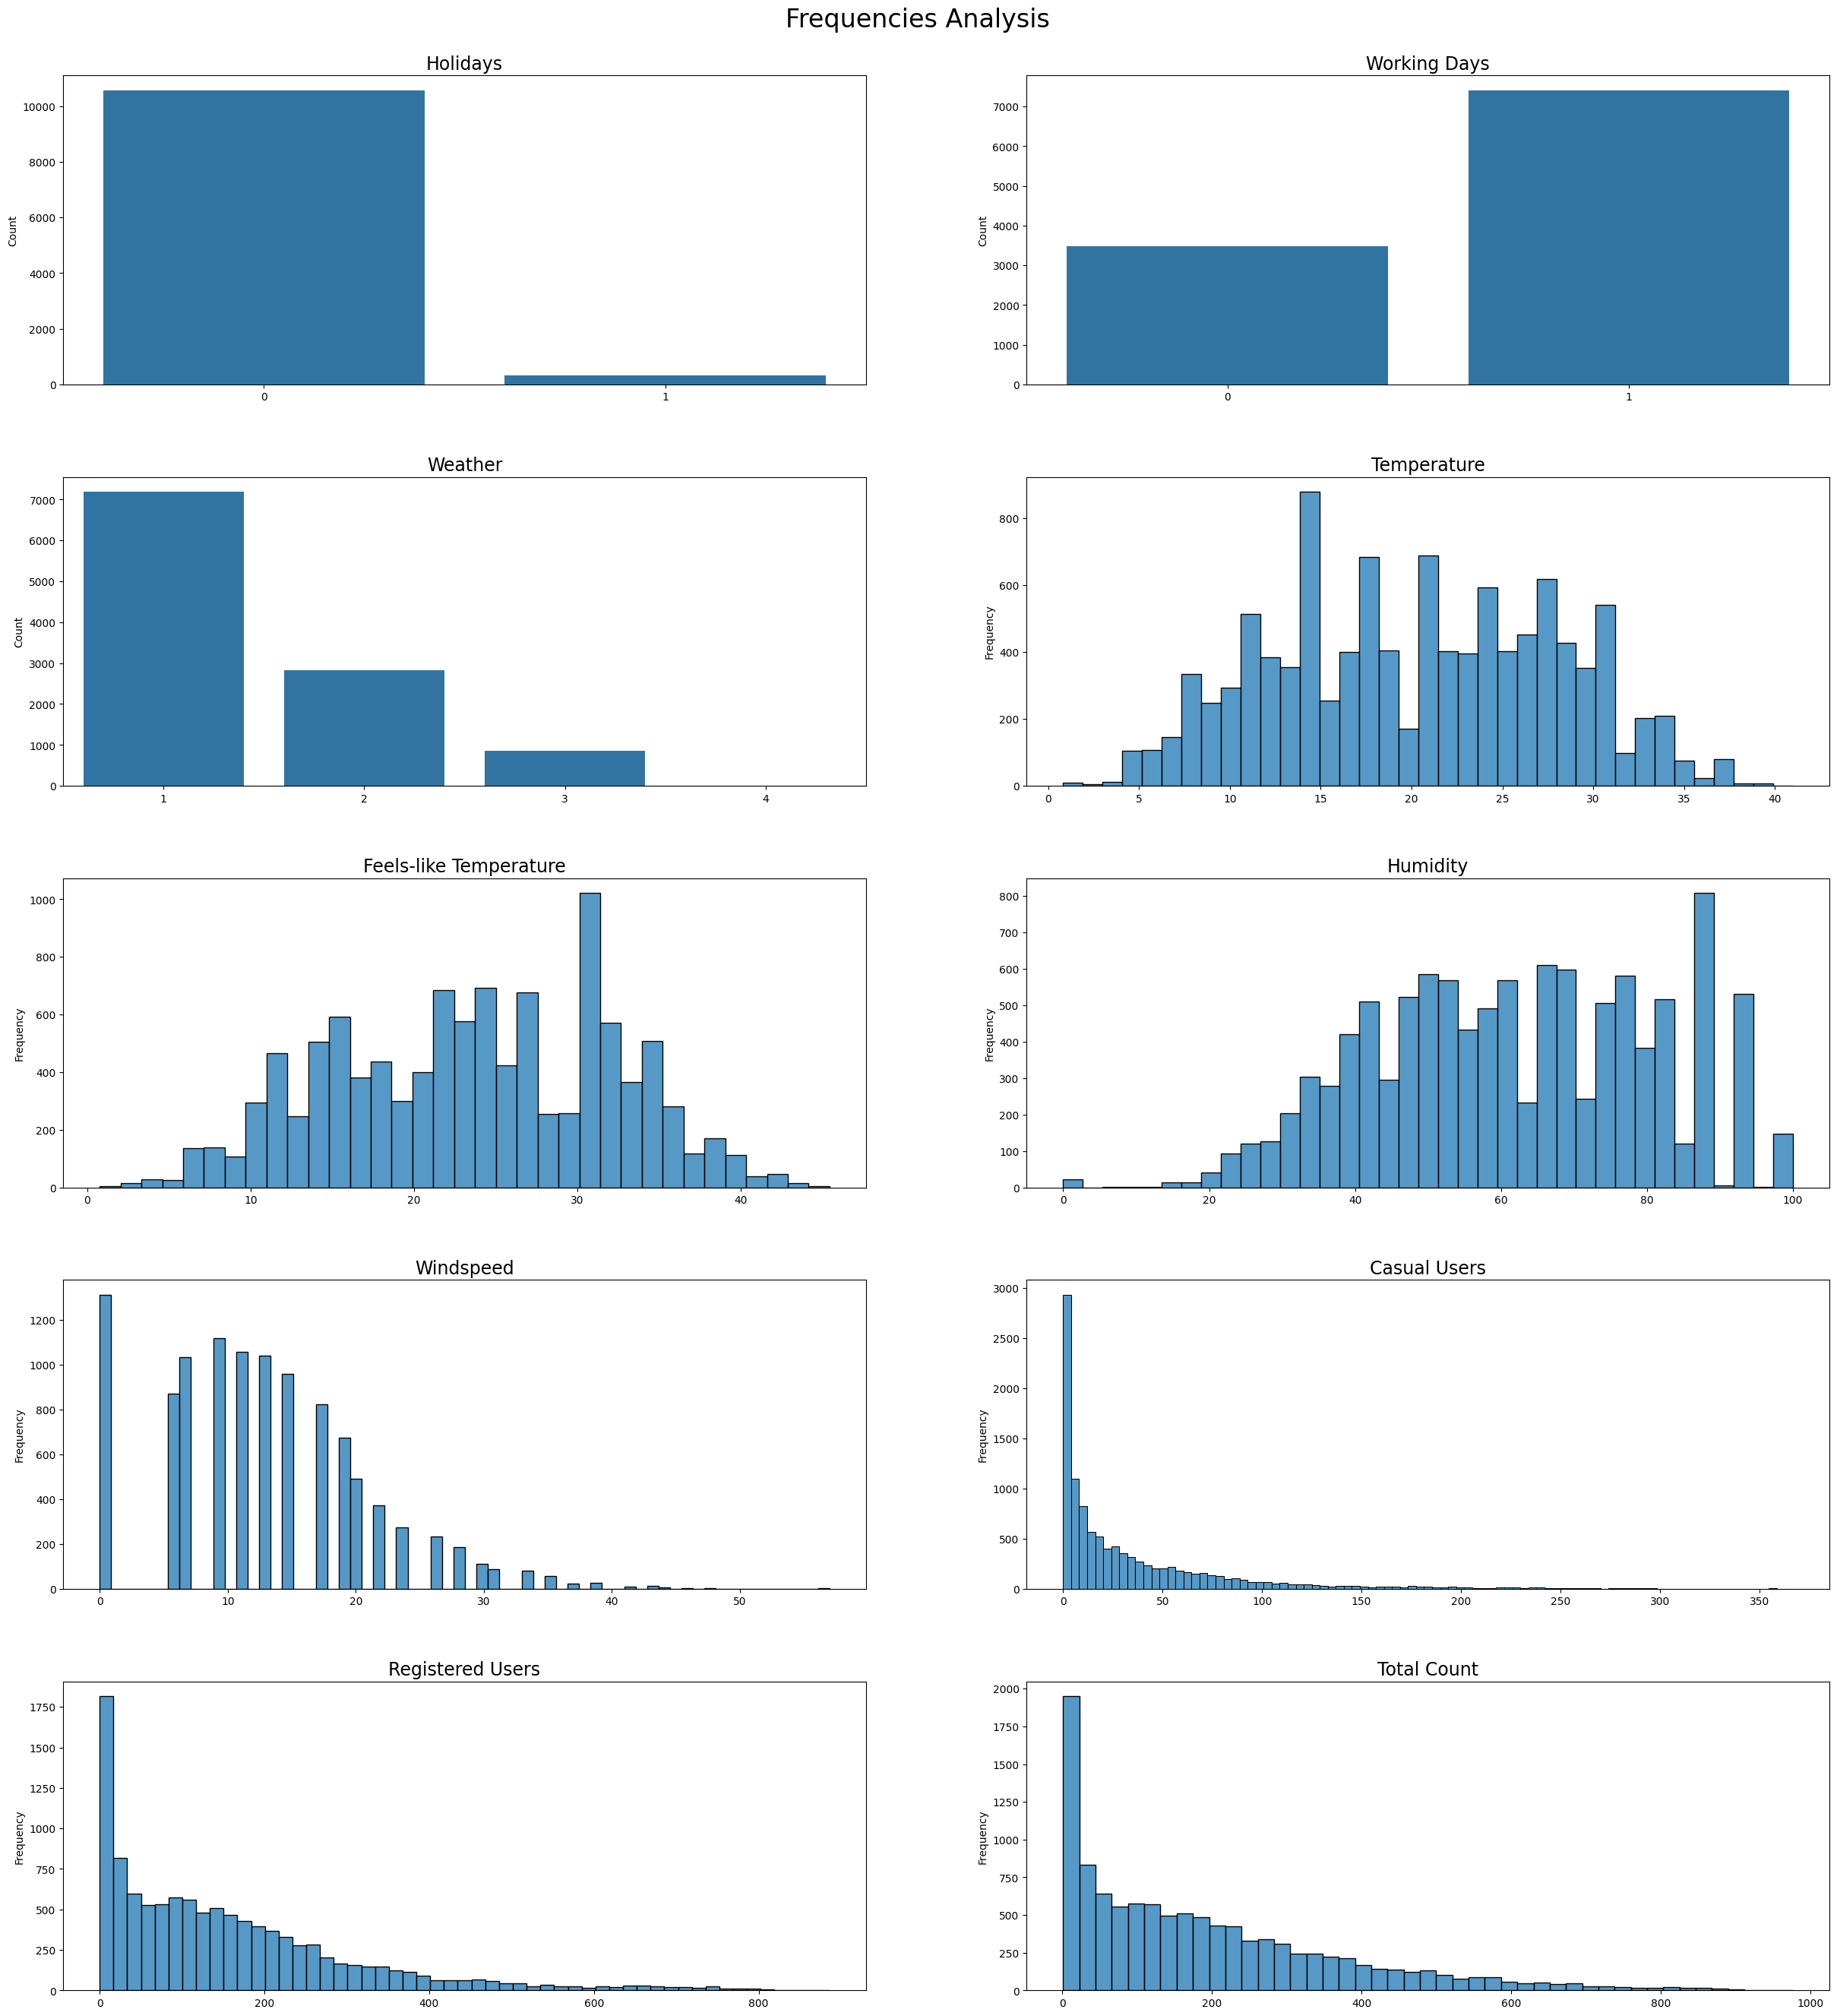

In [25]:
fig, axes = plt.subplots(5, 2, figsize=(30, 30))

#holiday
sns.countplot(data=df, x="holiday", ax=axes[0, 0])
axes[0, 0].set_title('Holidays', fontsize=17)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Count')

#workingday
sns.countplot(data=df, x="workingday", ax=axes[0, 1])
axes[0, 1].set_title('Working Days', fontsize=17)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Count')

#weather
sns.countplot(data=df, x="weather", ax=axes[1, 0])
axes[1, 0].set_title('Weather', fontsize=17)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Count')

#temp
sns.histplot(data=df, x="temp", ax=axes[1, 1])
axes[1, 1].set_title('Temperature', fontsize=17)
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Frequency')

#atemp
sns.histplot(data=df, x="atemp", ax=axes[2, 0])
axes[2, 0].set_title('Feels-like Temperature', fontsize=17)
axes[2, 0].set_xlabel('')
axes[2, 0].set_ylabel('Frequency')

#humidity
sns.histplot(data=df, x="humidity", ax=axes[2, 1])
axes[2, 1].set_title('Humidity', fontsize=17)
axes[2, 1].set_xlabel('')
axes[2, 1].set_ylabel('Frequency')

#windspeed
sns.histplot(data=df, x="windspeed", ax=axes[3, 0])
axes[3, 0].set_title('Windspeed', fontsize=17)
axes[3, 0].set_xlabel('')
axes[3, 0].set_ylabel('Frequency')

#casual
sns.histplot(data=df, x="casual", ax=axes[3, 1])
axes[3, 1].set_title('Casual Users', fontsize=17)
axes[3, 1].set_xlabel('')
axes[3, 1].set_ylabel('Frequency')

#registered
sns.histplot(data=df, x="registered", ax=axes[4, 0])
axes[4, 0].set_title('Registered Users', fontsize=17)
axes[4, 0].set_xlabel('')
axes[4, 0].set_ylabel('Frequency')

#count
sns.histplot(data=df, x="count", ax=axes[4, 1])
axes[4, 1].set_title('Total Count', fontsize=17)
axes[4, 1].set_xlabel('')
axes[4, 1].set_ylabel('Frequency')

plt.subplots_adjust(hspace=0.3, top=0.95)
plt.suptitle("Frequencies Analysis", fontsize=24)
plt.show()

Text(0, 0.5, 'Count')

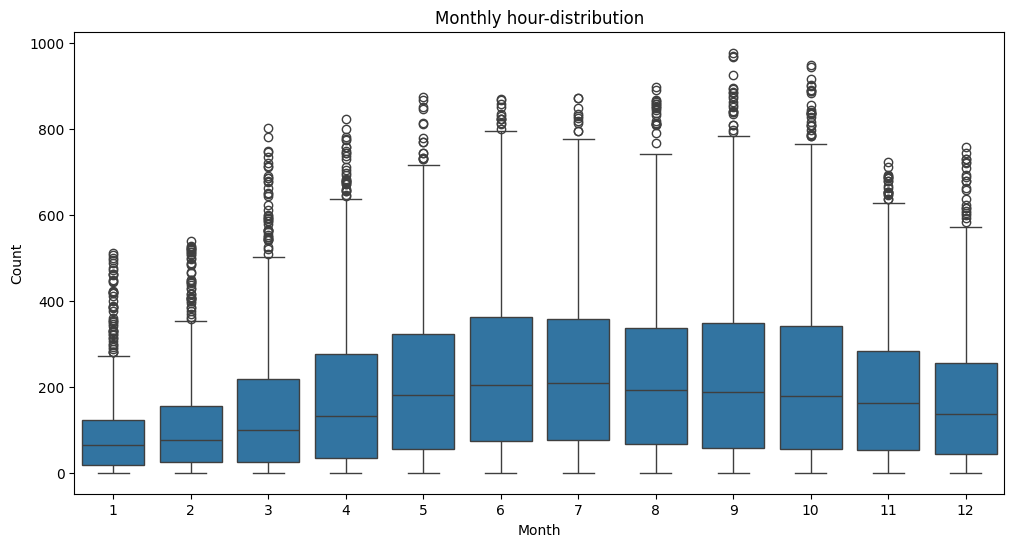

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df, x = "month", y = "count")
plt.title("Monthly hour-distribution")
plt.xlabel('Month')
plt.ylabel('Count')

Text(0.5, 1.0, 'Correlations between variables')

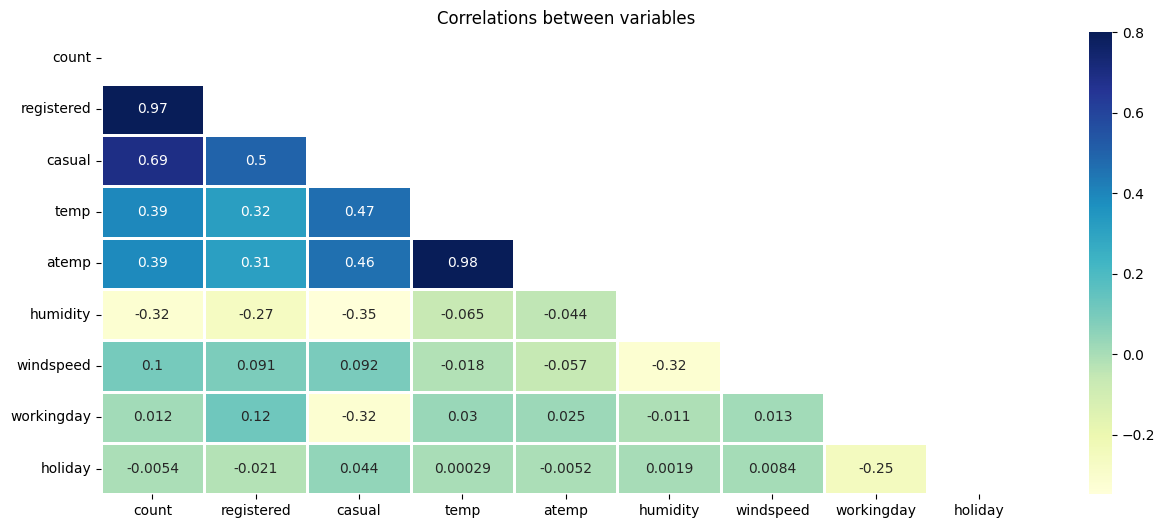

In [27]:
temp = df[['count', 'registered', 'casual', 'temp', 'atemp', 'humidity', 'windspeed', 'workingday', 'holiday']]
corr = temp.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(corr, mask=mask, vmax=.8, square=False, annot=True, ax=ax, linewidths=1, cmap='YlGnBu')
plt.title("Correlations between variables")

/var/folders/bn/prwtql5x5sg0mbkxc6508fqm0000gn/T/ipykernel_22432/2773445525.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x="atemp", y="count", fill=True, shade=True, ax=axes[0])
/var/folders/bn/prwtql5x5sg0mbkxc6508fqm0000gn/T/ipykernel_22432/2773445525.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x="humidity", y="count", fill=True, shade=True, ax=axes[1])


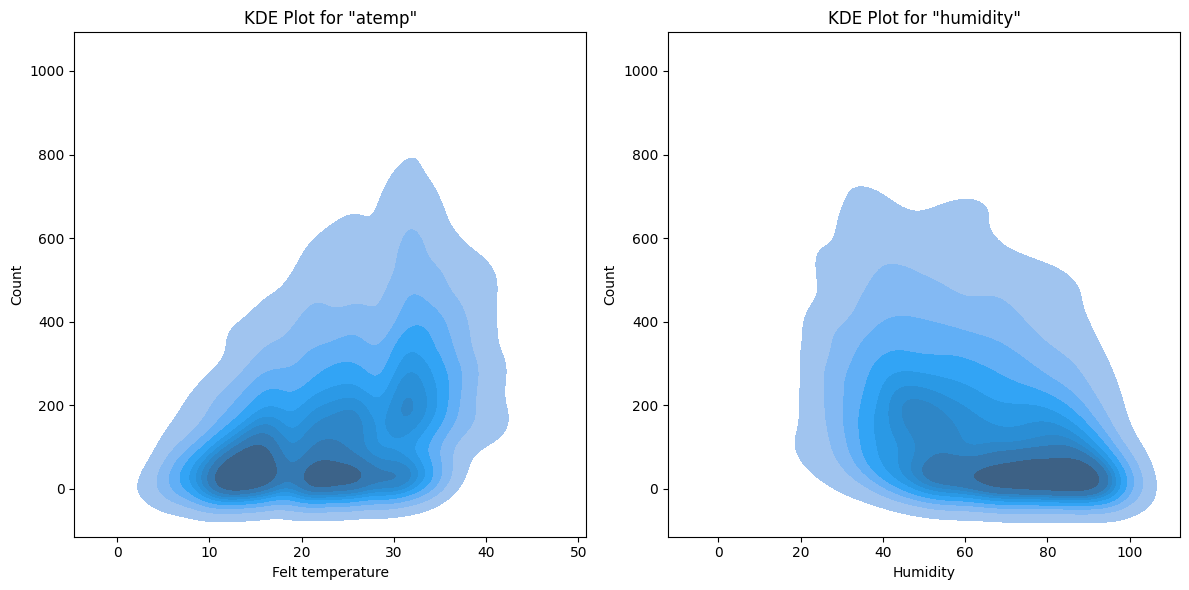

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.kdeplot(data=df, x="atemp", y="count", fill=True, shade=True, ax=axes[0])
axes[0].set_title('KDE Plot for "atemp"')
axes[0].set_xlabel('Felt temperature')
axes[0].set_ylabel('Count')
sns.kdeplot(data=df, x="humidity", y="count", fill=True, shade=True, ax=axes[1])
axes[1].set_title('KDE Plot for "humidity"')
axes[1].set_xlabel('Humidity')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Total Count')

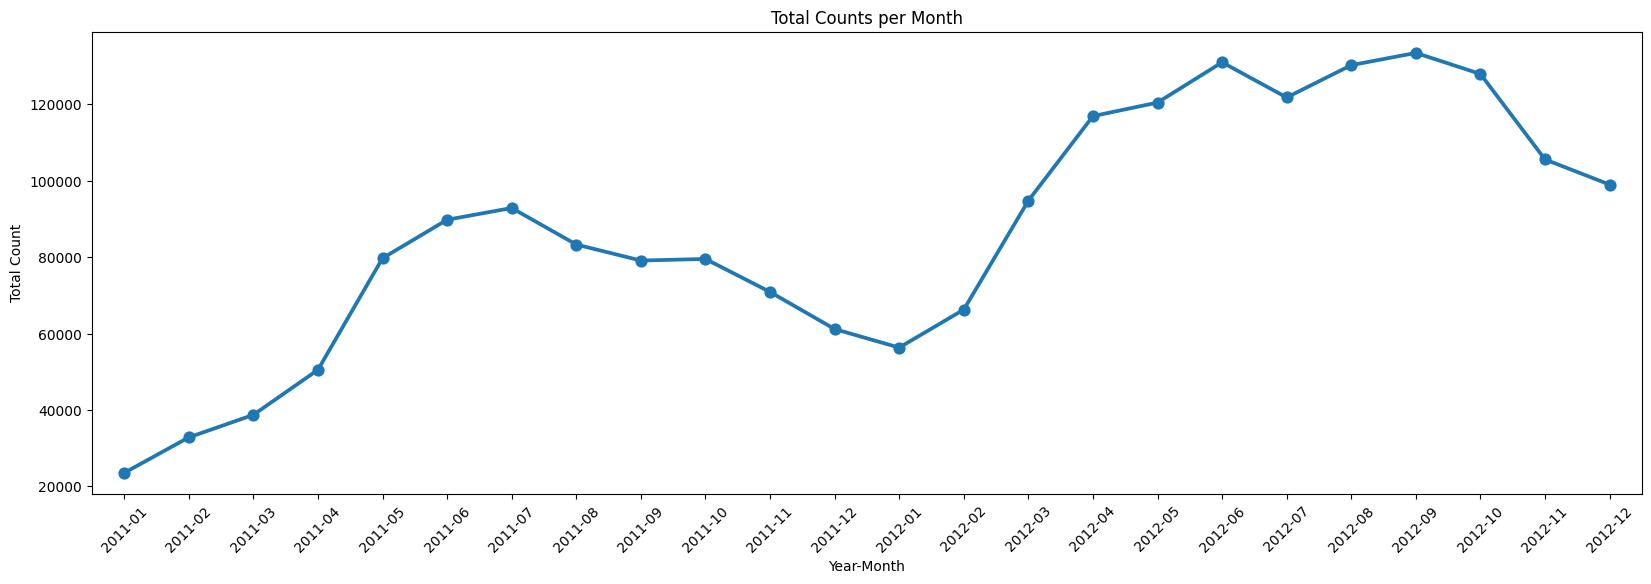

In [29]:
datetime_mo = np.vectorize(lambda x: x[:7])(datetime)
df["temp_mo"] = datetime_mo
subsums_mo = df.groupby("temp_mo")["count"].sum().reset_index()
plt.figure(figsize=(20, 6))
sns.pointplot(data= subsums_mo, x="temp_mo", y="count")
plt.xticks(rotation=45)
plt.title('Total Counts per Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Count')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, '2011-01'),
  Text(1, 0, '2011-02'),
  Text(2, 0, '2011-03'),
  Text(3, 0, '2011-04'),
  Text(4, 0, '2011-05'),
  Text(5, 0, '2011-06'),
  Text(6, 0, '2011-07'),
  Text(7, 0, '2011-08'),
  Text(8, 0, '2011-09'),
  Text(9, 0, '2011-10'),
  Text(10, 0, '2011-11'),
  Text(11, 0, '2011-12'),
  Text(12, 0, '2012-01'),
  Text(13, 0, '2012-02'),
  Text(14, 0, '2012-03'),
  Text(15, 0, '2012-04'),
  Text(16, 0, '2012-05'),
  Text(17, 0, '2012-06'),
  Text(18, 0, '2012-07'),
  Text(19, 0, '2012-08'),
  Text(20, 0, '2012-09'),
  Text(21, 0, '2012-10'),
  Text(22, 0, '2012-11'),
  Text(23, 0, '2012-12')])

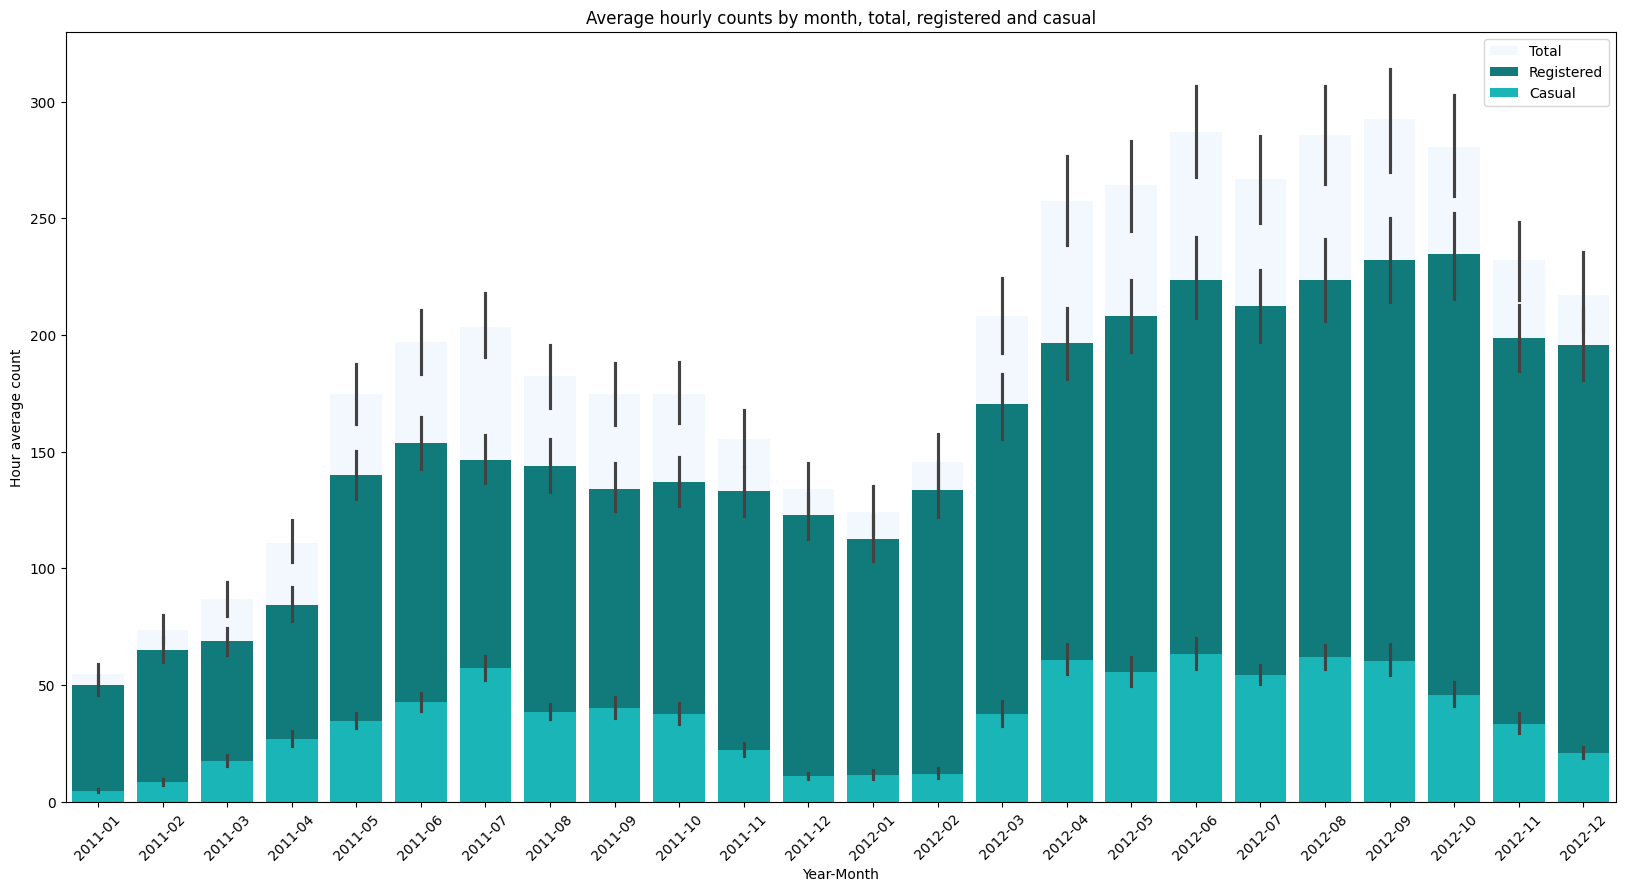

In [30]:
plt.figure(figsize=(20,10))
sns.barplot(data=df, x="temp_mo", y="count", label="Total", color="aliceblue")
sns.barplot(data=df, x="temp_mo", y="registered", label="Registered", color = "darkcyan")
sns.barplot(data=df, x="temp_mo", y="casual", label="Casual", color = "darkturquoise")
plt.legend()
plt.title('Average hourly counts by month, total, registered and casual')
plt.xlabel('Year-Month')
plt.ylabel('Hour average count')
plt.xticks(rotation=45)

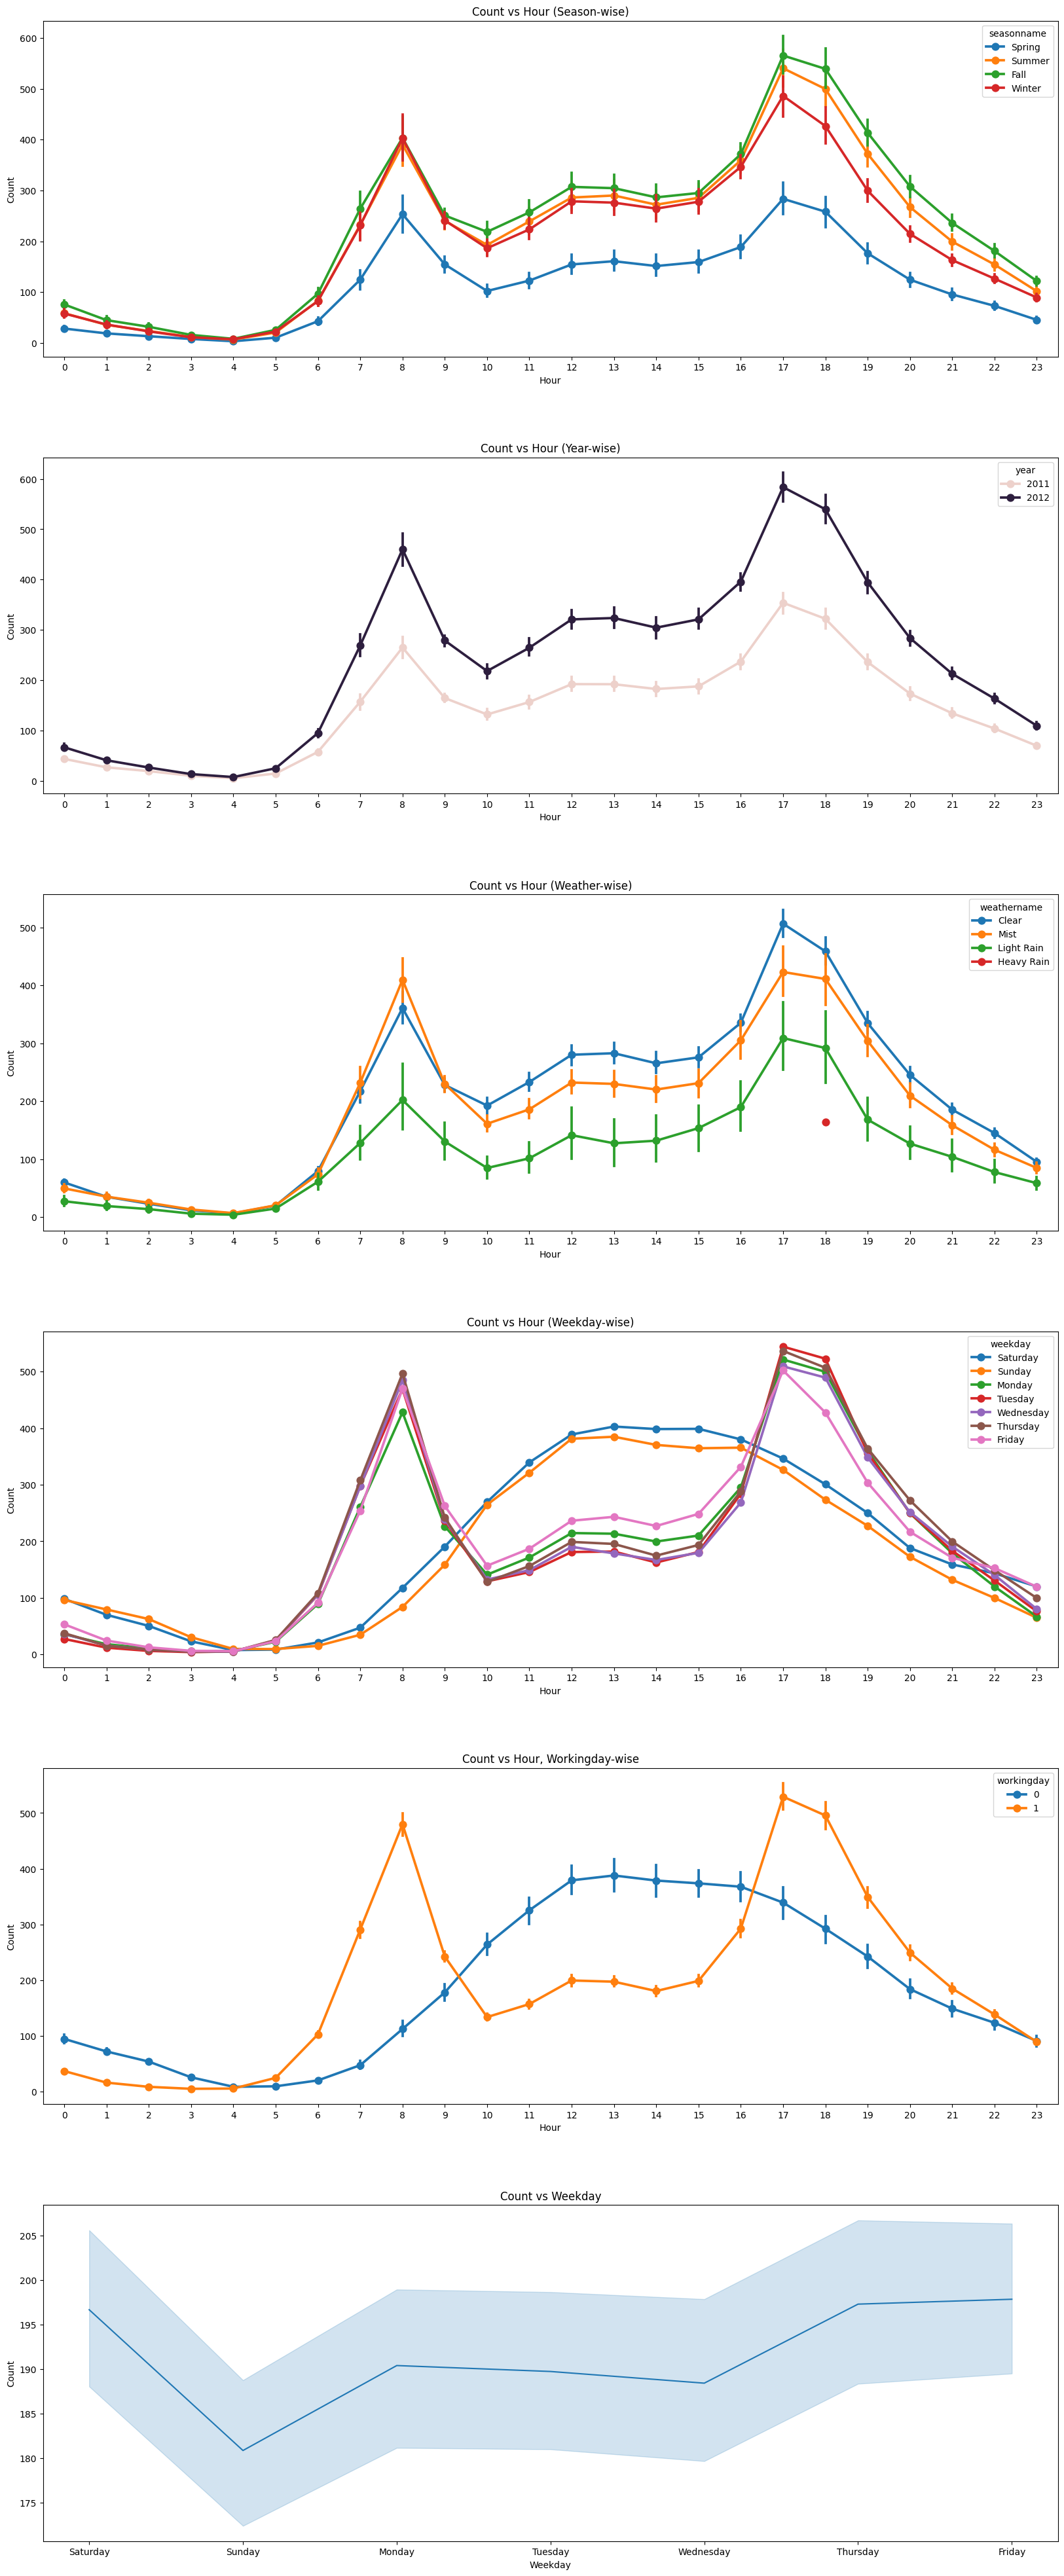

In [31]:
fig, axes = plt.subplots(6, 1, figsize=(20, 50))

#by season
sns.pointplot(data=df, x="hour", y="count", hue="seasonname", ax=axes[0])
axes[0].set_title('Count vs Hour (Season-wise)')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Count')

#by year
sns.pointplot(data=df, x="hour", y="count", hue="year", ax=axes[1])
axes[1].set_title('Count vs Hour (Year-wise)')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Count')

#by weather
sns.pointplot(data=df, x="hour", y="count", hue="weathername", ax=axes[2])
axes[2].set_title('Count vs Hour (Weather-wise)')
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('Count')

#by weekday
df["date"] = df["datetime"].apply(lambda x: x.split()[0])
df["date"] = pd.to_datetime(df["date"])
df["weekday"] = df["date"].dt.weekday.apply(lambda x: calendar.day_name[x])
sns.pointplot(data=df, x="hour", y="count", hue="weekday", errorbar=None, ax=axes[3])
axes[3].set_title('Count vs Hour (Weekday-wise)')
axes[3].set_xlabel('Hour')
axes[3].set_ylabel('Count')

#working day
sns.pointplot(data=df, x="hour", y="count", hue="workingday", ax=axes[4])
axes[4].set_title('Count vs Hour, Workingday-wise')
axes[4].set_xlabel('Hour')
axes[4].set_ylabel('Count')

#by weekday
sns.lineplot(data=df, x="weekday", y="count", ax=axes[5])
axes[5].set_title('Count vs Weekday')
axes[5].set_xlabel('Weekday')
axes[5].set_ylabel('Count')

plt.subplots_adjust(hspace=0.3)
plt.show()

Text(0, 0.5, 'Daily count')

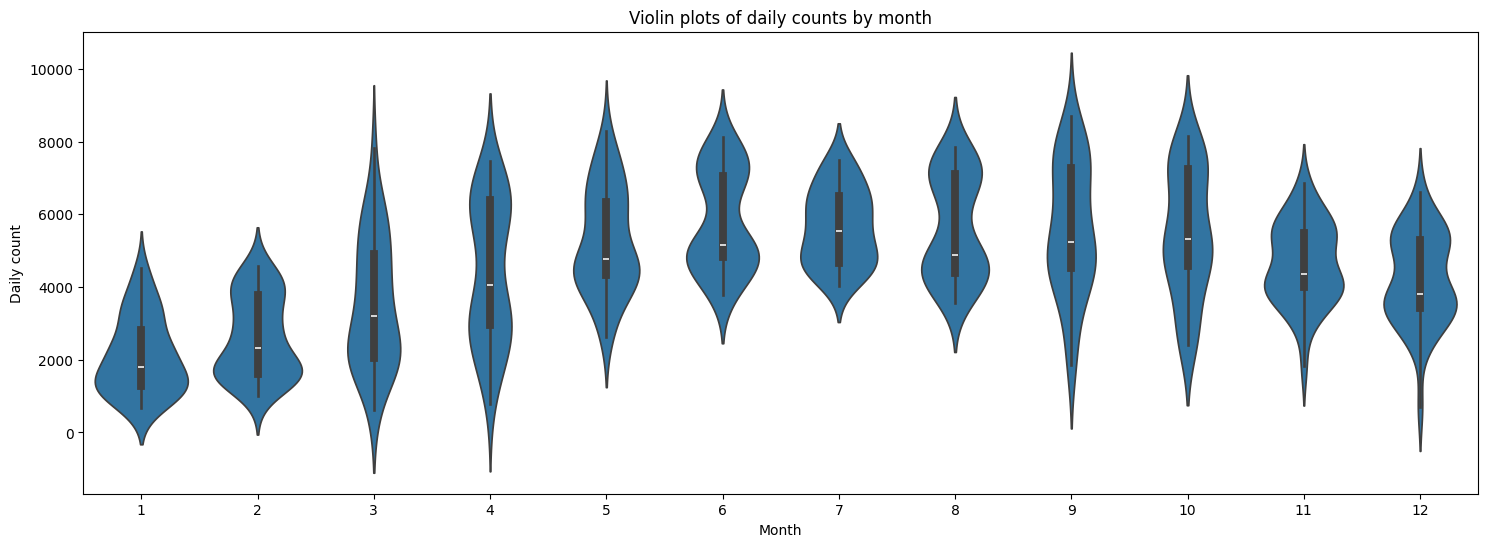

In [32]:
grouped = df.groupby("date")["count"].sum().reset_index()
grouped["month"] = grouped["date"].apply(lambda x: x.month)
plt.figure(figsize=(18, 6))
sns.violinplot(data = grouped, x = "month", y = "count")
plt.title("Violin plots of daily counts by month")
plt.xlabel('Month')
plt.ylabel('Daily count')

Text(0, 0.5, 'Daily average count')

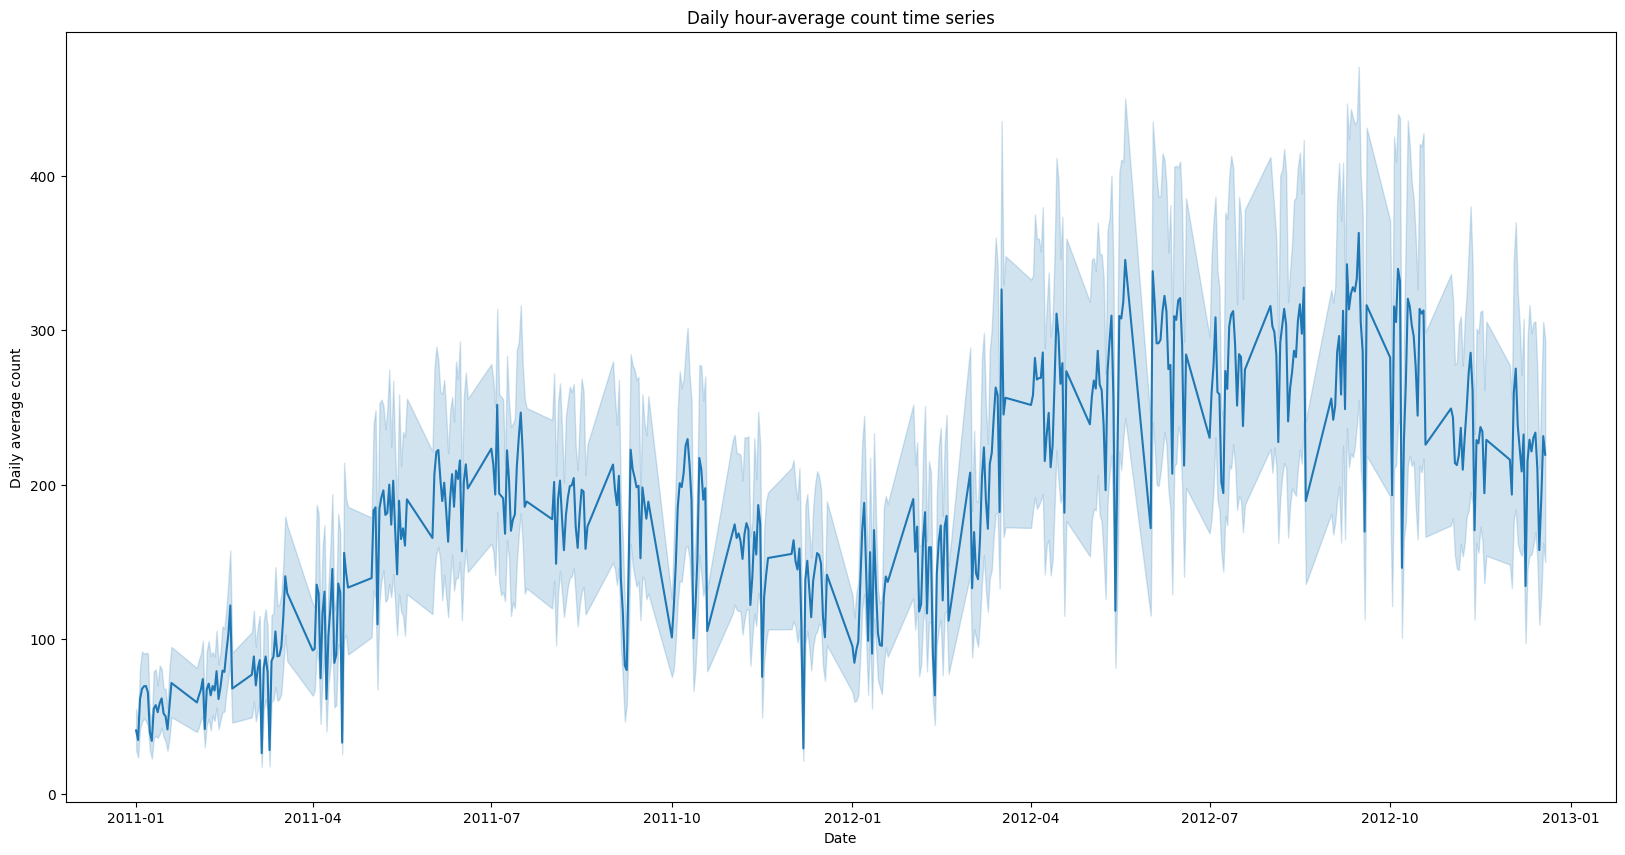

In [33]:
#FINAL TIME SERIES PLOT
plt.figure(figsize=(20,10))
sns.lineplot(data=df, x='date', y='count')
plt.title("Daily hour-average count time series")
plt.xlabel('Date')
plt.ylabel('Daily average count')

In [34]:
# drop useless columns
df = df.drop(columns=["registered", "casual", "temp_mo", "date", "weekday", "seasonname", "weathername", "monthname"])